In [43]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt


#Import the data
actual_prices = pd.read_csv("/Users/Michael/GenX-main/Example_Systems/OneZone_TX_Prices/2019_empirical_electricity_prices.csv")
simulated_prices = pd.read_csv("/Users/Michael/GenX-main/Example_Systems/OneZone_TX_Prices/Results_19/prices.csv")

#reformat data
actual_prices = actual_prices.drop(columns = ['Unnamed: 0'])
simulated_prices = simulated_prices.drop(columns = ['Zone'])


In [ ]:
#Simple Metrics
#   1) average price
#   2) variance of prices
#   3) Pearson correaltion

In [79]:
# Average Price

def Avg_Price (prices):

    return prices.sum()/len(prices)


#Variance

def Price_Var (prices):

    return prices.var()


#Pearson Correlation

def Pearson_Corr(df_actual, df_simulated):
    
    price_df = pd.concat([df_actual, df_simulated], axis = 1)
    price_df.columns =["Actual", "Simulated"]

    return price_df.corr(method = 'pearson')


In [19]:
#Advance Metrics
#   1) Daily Spearman Correlation
#   2) Pearson with Critical Peak Pricing **This is not working??? Taking out Top 10 hours decreases Peason correlation??

In [ ]:
#Daily Spearman Correlation

def Daily_Spearman_Corr (df_actual, df_simulated):

    price_df = pd.concat([df_actual, df_simulated], axis = 1)
    price_df.columns =["Actual", "Simulated"]

    Daily_Spearmans = [0] * 365

    for i in range(365):
        daily_spearman = price_df[i * 24 : (i + 1) * 24].corr(method = 'spearman')
        Daily_Spearmans[i] = daily_spearman['Simulated'][0]
    
    return Daily_Spearmans


,Actual,Simulated
Actual,1.000000,0.269271
Simulated,0.269271,1.000000


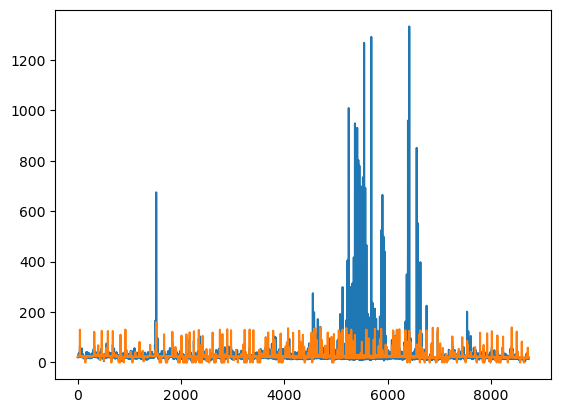

In [82]:
top_10_hours = actual_prices.nlargest(10, '0').index
top_30_hours = actual_prices.nlargest(30, '0').index

#CPP_10_actual = actual_prices.drop(top_10_hours).reindex()
CPP_10_actual = actual_prices
CPP_10_actual.iloc[top_10_hours] = Avg_Price(actual_prices)
CPP_10_simulated = simulated_prices
CPP_10_simulated.iloc[top_10_hours] = Avg_Price(actual_prices)
#CPP_10_simulated = simulated_prices.drop(top_10_hours).reset_index(drop=True)

CPP_30_actual = actual_prices.drop(actual_prices.index[top_30_hours]).reset_index(drop=True)
CPP_30_simulated = simulated_prices.drop(actual_prices.index[top_30_hours]).reset_index(drop=True)

#print(actual_prices.loc[actual_prices.nlargest(10, '0').index])
#print(actual_prices.loc[actual_prices.nlargest(30, '0').index])



plt.plot(CPP_30_actual)
plt.plot(CPP_30_simulated)

#plt.plot(actual_prices)
#plt.plot(simulated_prices)

Pearson_Corr(CPP_10_actual, CPP_10_simulated)


In [88]:
print(len(simulated_prices))
print(len(actual_prices))

#top_10_hours
actual_prices.iloc[top_10_hours]
#simulated_prices.iloc[[x - 1 for x in top_10_hours]]

8760
8760


,0
5943,37.624927
5967,37.624927
5942,37.624927
5966,37.624927
5702,37.624927
5463,37.624927
5462,37.624927
5582,37.624927
5391,37.624927
5390,37.624927


In [51]:
actual_prices[:10]

,0
0,20.54
1,19.82
2,19.60
3,19.25
4,21.28
5,22.63
6,24.06
7,24.72
8,25.05
9,24.88


In [52]:
spear_daily = Daily_Spearman_Corr(actual_prices, simulated_prices)



In [54]:
x = min(spear_daily)

while x < .5:
    print(spear_daily.index(min(spear_daily)))
    del spear_daily[spear_daily.index(min(spear_daily))]
    x = min(spear_daily)





360
302
20
56


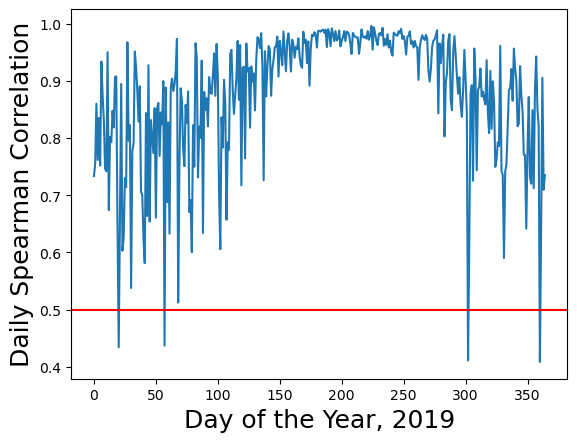

In [55]:
import matplotlib.pyplot as plt

plt.plot(Spearman_Corr(actual_prices, simulated_prices))
plt.ylabel("Daily Spearman Correlation", fontsize = 18)
plt.xlabel("Day of the Year, 2019", fontsize = 18)

plt.axhline(y = .5, color = 'r')



#put a line at 0.5, what happens at the 4 days, what is the average price, plot the price patterns

In [48]:
min(Spearman_Corr(actual_prices, simulated_prices))

0.4085285493971924

In [ ]:
#annual sums of generation in sim vs actual
#timeseries of hourly generation profile